In [4]:
# import python libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [5]:
# import csv file
df = pd.read_csv('BlackFriday_Sales_Data.csv', encoding= 'unicode_escape')

In [6]:
df.shape

(11251, 15)

In [7]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Isabella,P00125942,F,26-35,28,0,Indiana,Western,Healthcare,Auto,1,287.42,NaN,NaN
1,1000732,Victoria,P00110942,F,26-35,35,1,Montana,Southern,Govt,Auto,3,287.21,NaN,NaN
2,1001990,Alexander,P00118542,F,26-35,35,1,Georgia,Central,Automobile,Auto,3,287.09,NaN,NaN
3,1001425,Amelia,P00237842,M,0-17,16,0,South Dakota,Southern,Construction,Auto,2,286.94,NaN,NaN
4,1000588,Mason,P00057942,M,26-35,28,1,Missouri,Western,Food Processing,Auto,2,286.52,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [9]:
#drop unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [11]:
#check for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [12]:
# drop null values
df.dropna(inplace=True)

In [13]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [14]:
df['Amount'].dtypes

dtype('int64')

In [15]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [16]:
#rename column
df.rename(columns= {'Marital_Status':'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Isabella,P00125942,F,26-35,28,0,Indiana,Western,Healthcare,Auto,1,287
1,1000732,Victoria,P00110942,F,26-35,35,1,Montana,Southern,Govt,Auto,3,287
2,1001990,Alexander,P00118542,F,26-35,35,1,Georgia,Central,Automobile,Auto,3,287
3,1001425,Amelia,P00237842,M,0-17,16,0,South Dakota,Southern,Construction,Auto,2,286
4,1000588,Mason,P00057942,M,26-35,28,1,Missouri,Western,Food Processing,Auto,2,286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Leo,P00296942,M,18-25,19,1,Arkansas,Western,Chemical,Office,4,4
11247,1004089,Benjamin,P00171342,M,26-35,33,0,Wisconsin,Northern,Healthcare,Veterinary,3,4
11248,1001209,Matthew,P00201342,F,36-45,40,0,Pennsylvania,Central,Textile,Office,4,2
11249,1004023,Samantha,P00059442,M,36-45,37,0,Arkansas,Southern,Agriculture,Office,3,2


In [18]:
# describe() method returns description of 
#the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,112.956402
std,1.716039e+03,12.753866,0.493589,1.114967,62.663771
min,1.000001e+06,12.000000,0.000000,1.000000,2.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,65.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,97.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,152.000000
max,1.006040e+06,92.000000,1.000000,4.000000,287.000000


In [19]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,112.956402
std,12.753866,1.114967,62.663771
min,12.000000,1.000000,2.000000
25%,27.000000,2.000000,65.000000
50%,33.000000,2.000000,97.000000
75%,43.000000,3.000000,152.000000
max,92.000000,4.000000,287.000000


# Exploratory Data Analysis

### Gender

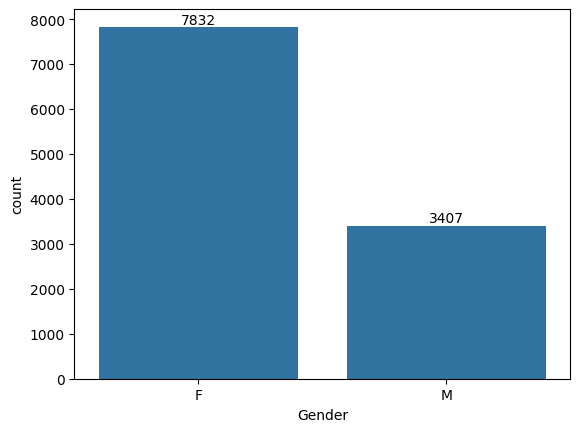

In [20]:
# plotting a bar chart for Gender and it's count

ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

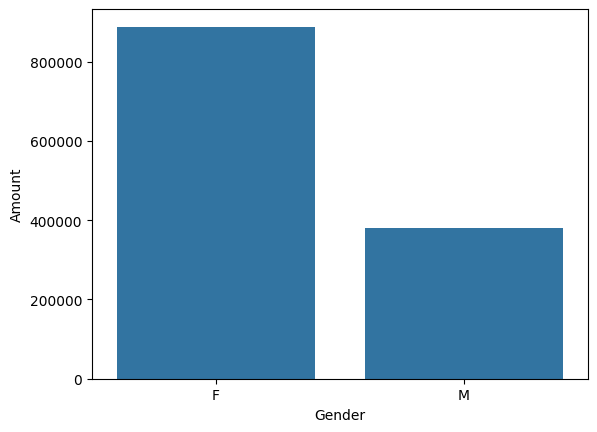

In [21]:
# plotting a bar chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### Age

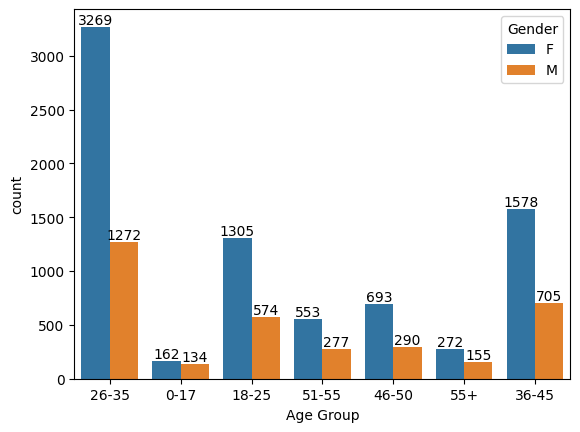

In [22]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

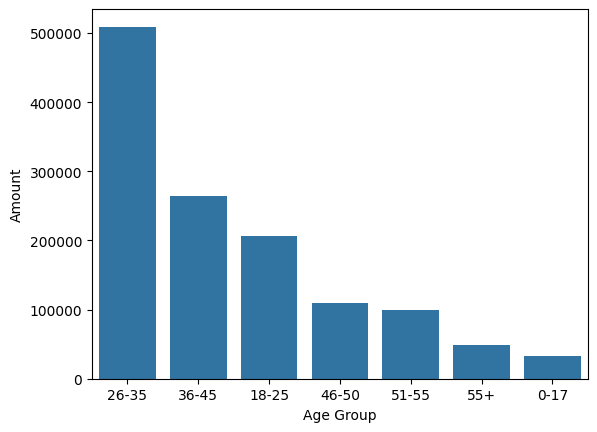

In [23]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### State

<Axes: xlabel='State', ylabel='Orders'>

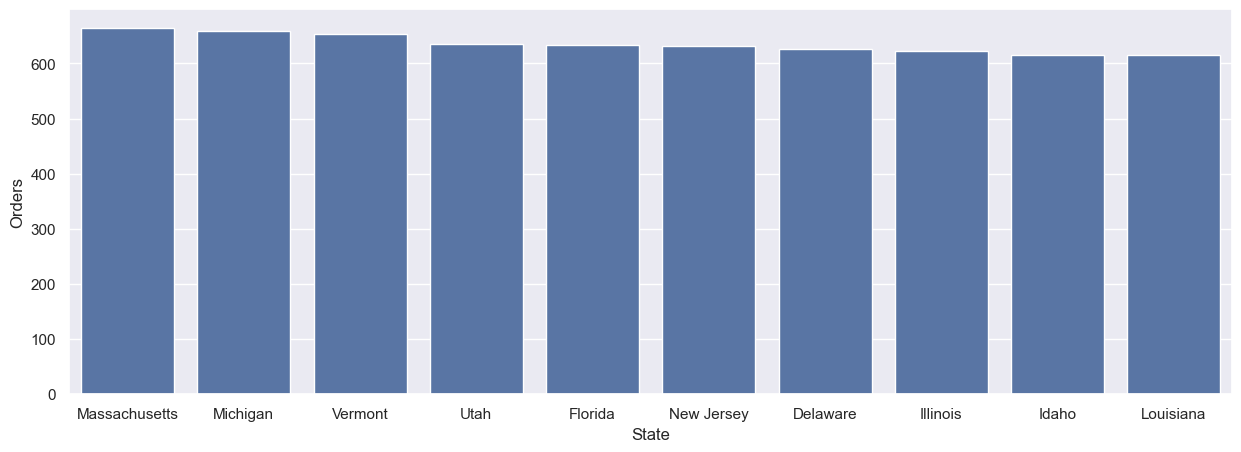

In [24]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders']
    .sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

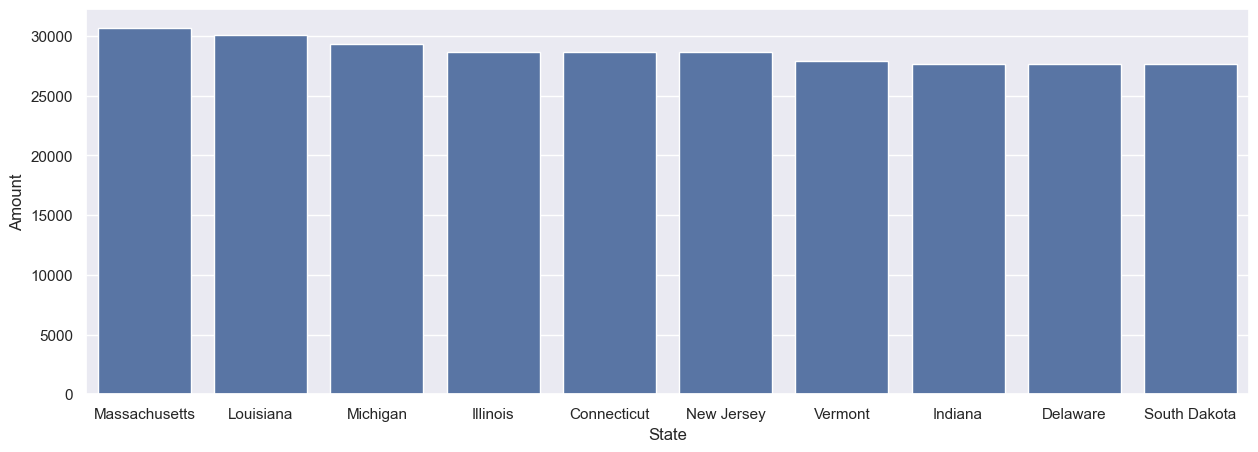

In [25]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum()
    .sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### Marital Status

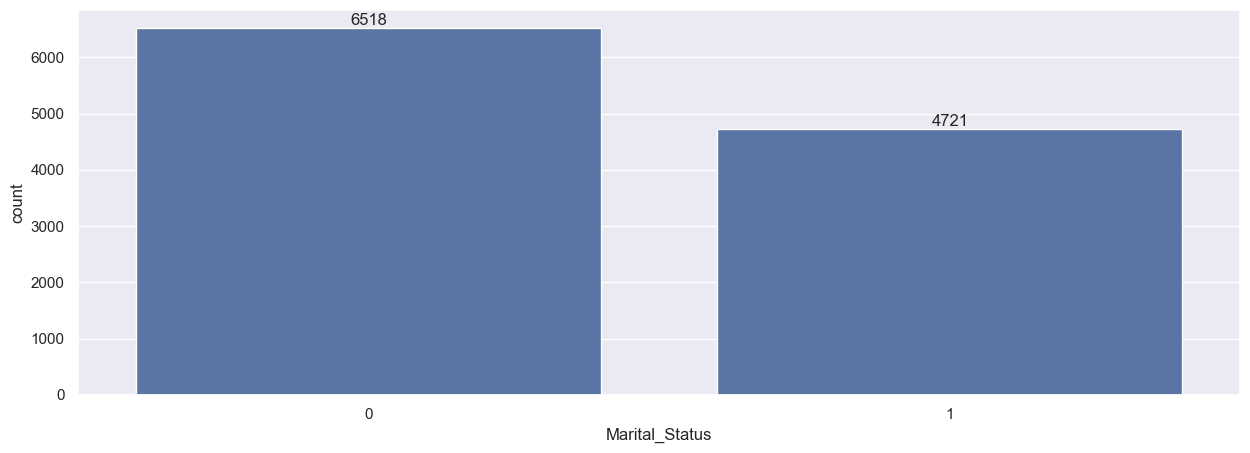

In [26]:
ax = sns.countplot(data = df, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

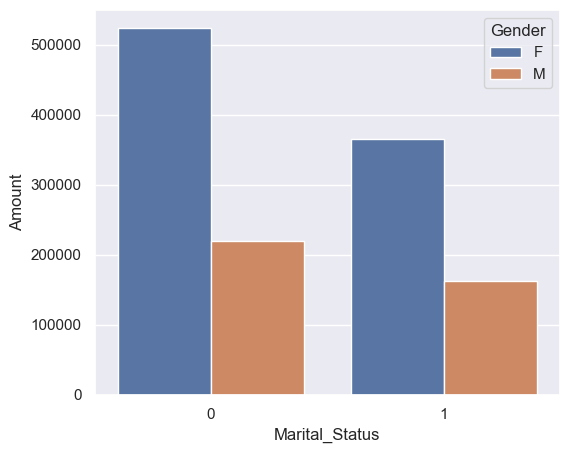

In [27]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount']
    .sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

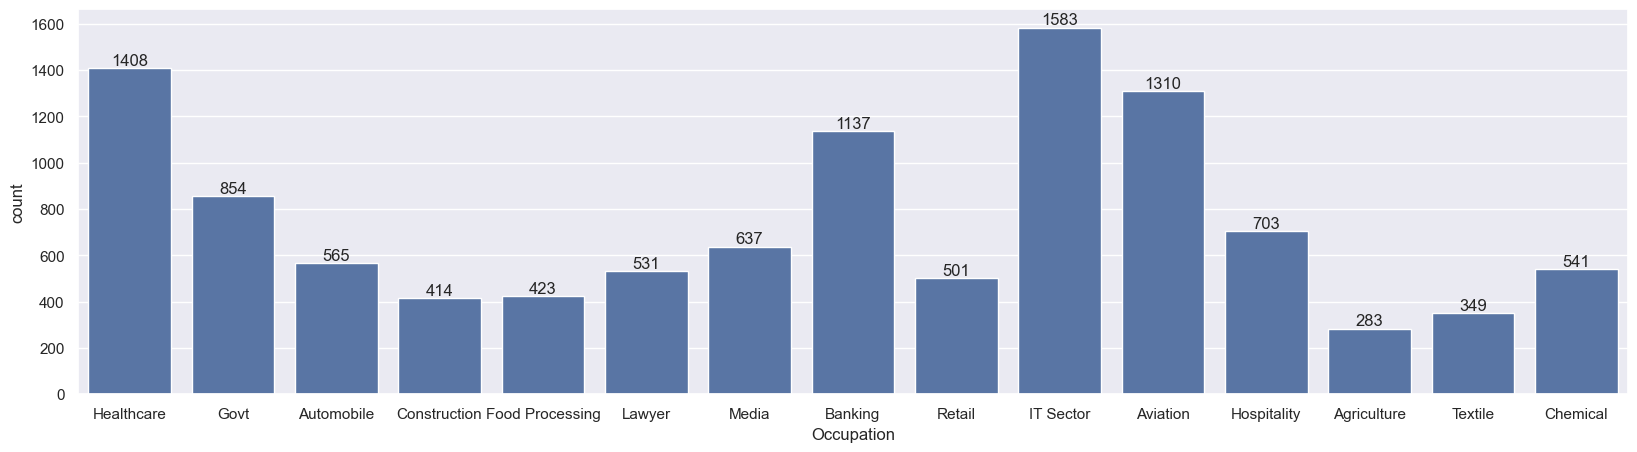

In [28]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

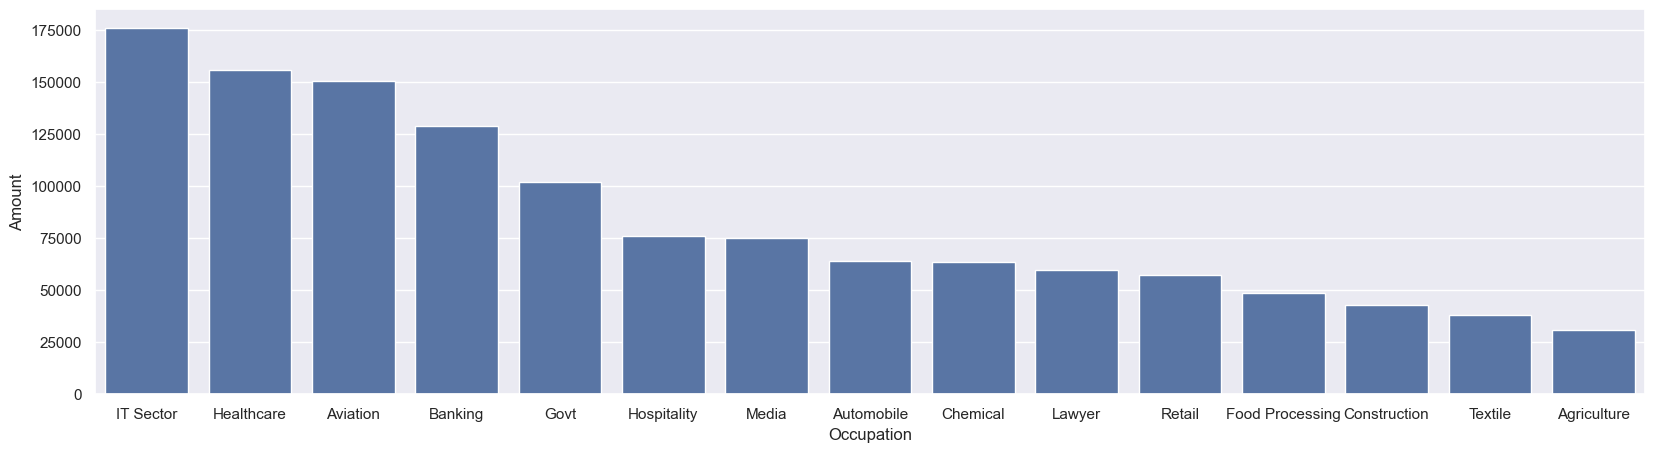

In [29]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount']
    .sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

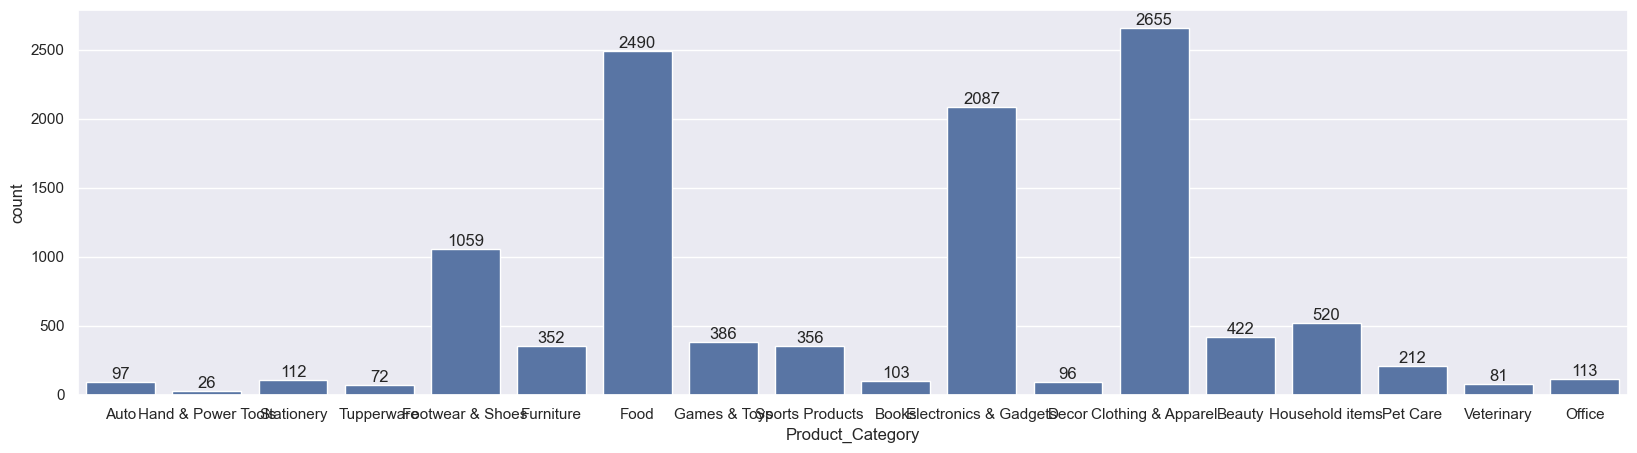

In [30]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

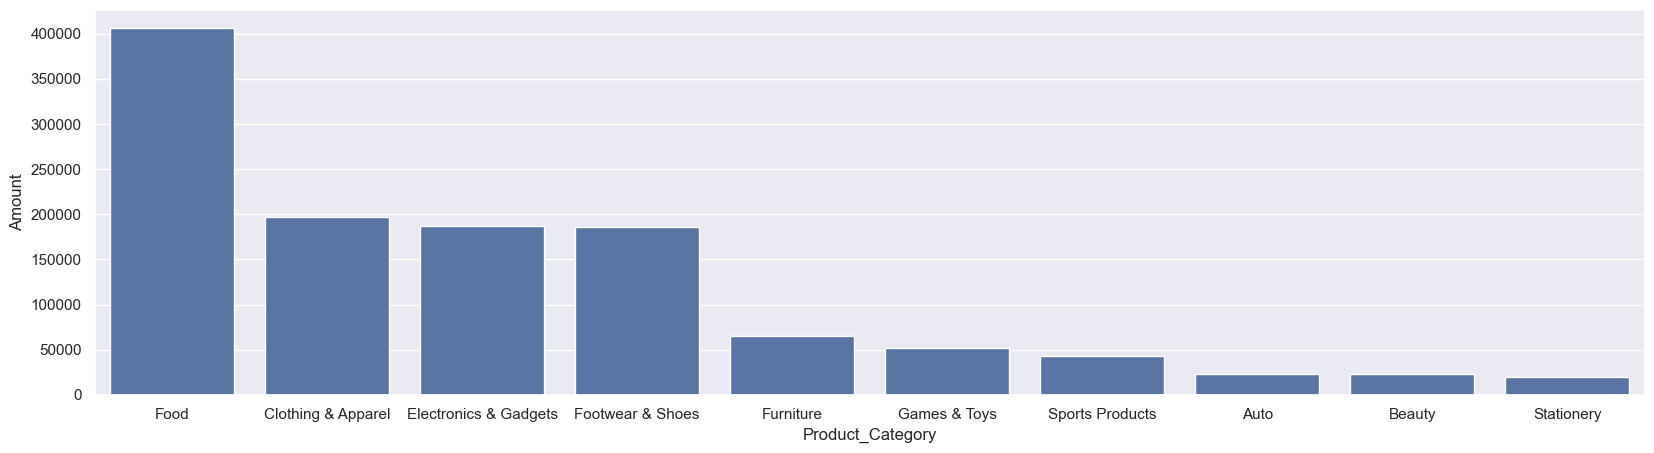

In [31]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount']
    .sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

<Axes: xlabel='Product_ID', ylabel='Orders'>

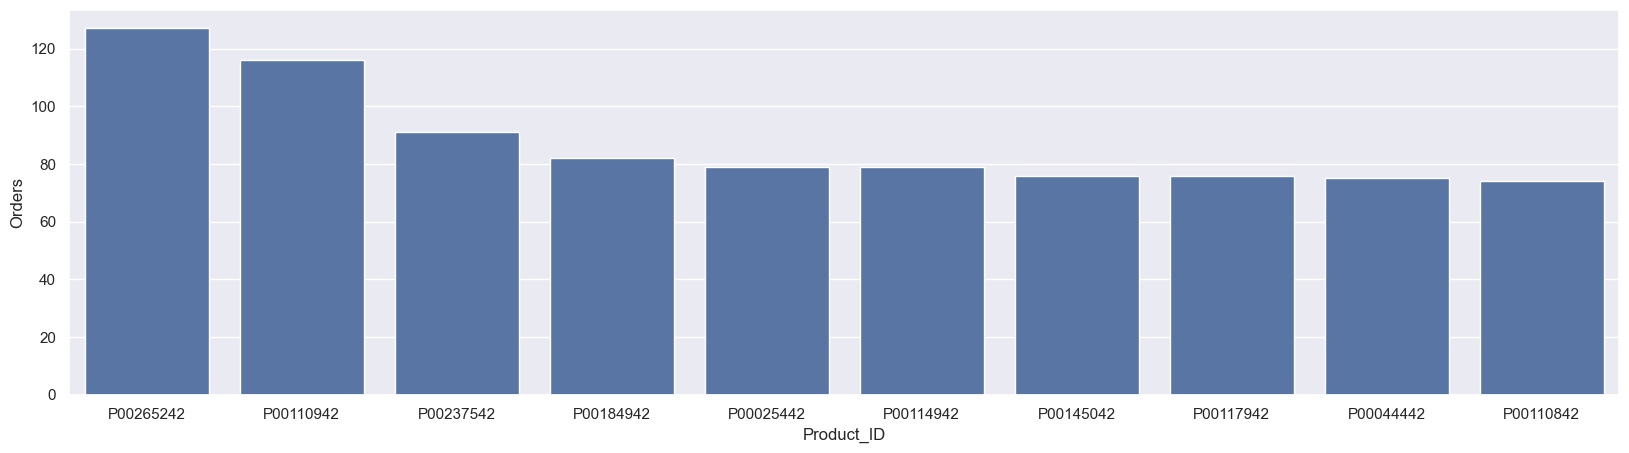

In [32]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders']
    .sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

<Axes: xlabel='Product_ID'>

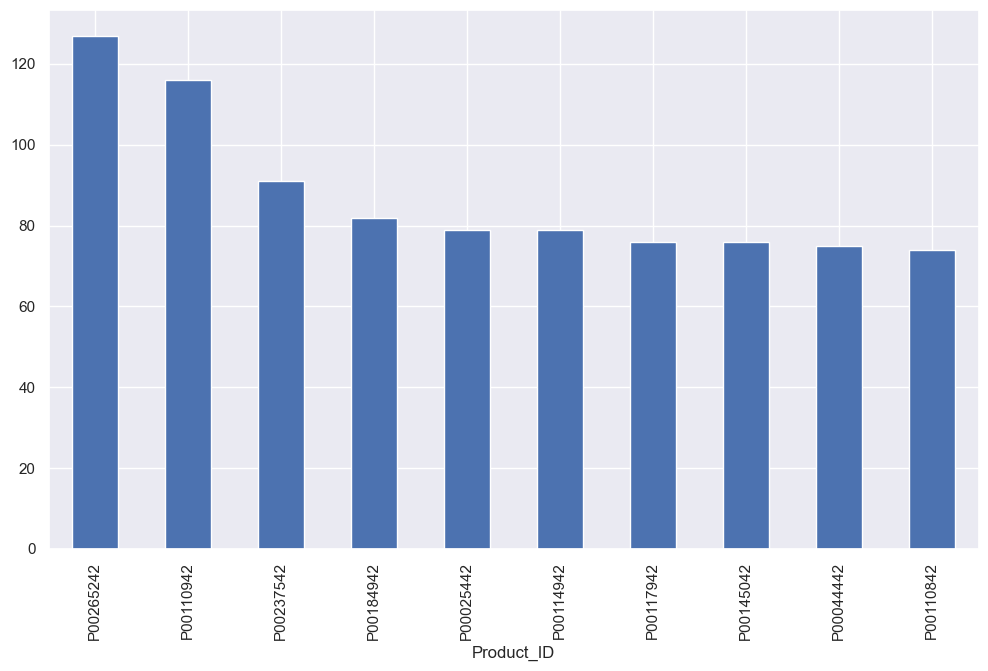

In [49]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

In [36]:
# Objective 1: Sales Statistics (Product Category, Amount, Gender)
# Total sales by product category

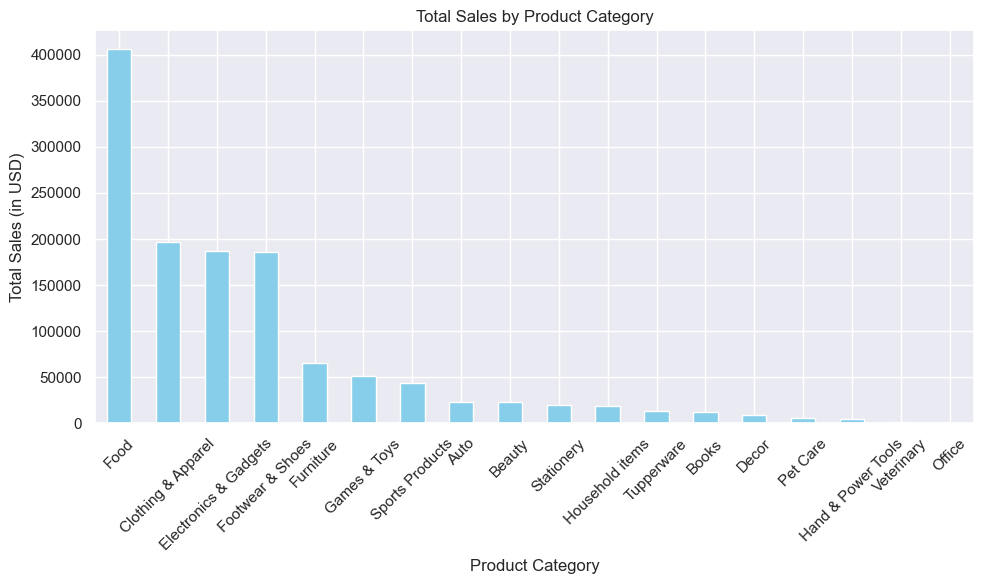

In [35]:
total_sales_by_category = df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False)
total_sales_by_category.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales (in USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

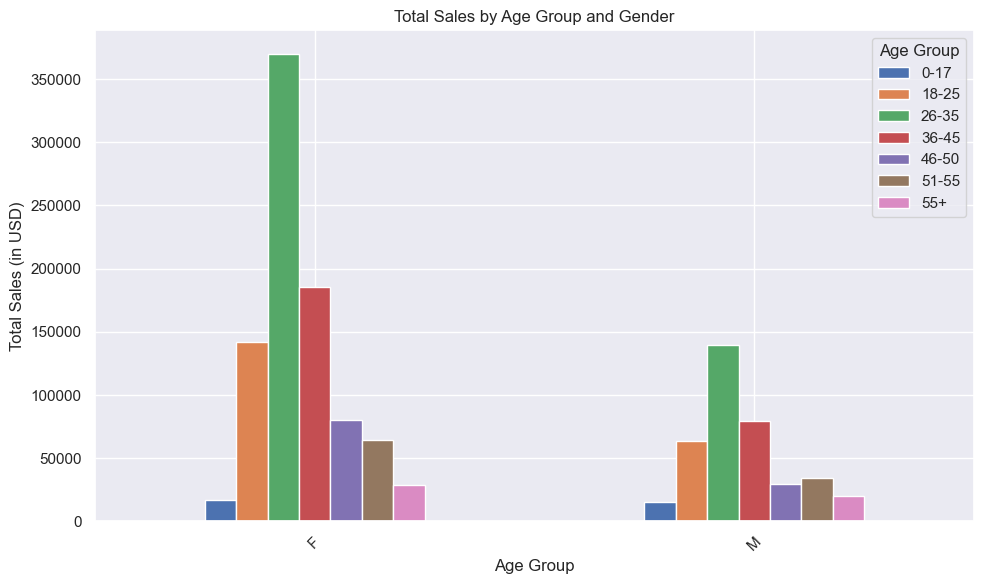

In [37]:
# Objective 2: Compare Age Group & Gender
# Total sales by Age Group and Gender
age_Gender_sales = df.groupby(['Age Group', 'Gender'])['Amount'].sum().unstack().T
age_Gender_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Total Sales by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Total Sales (in USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

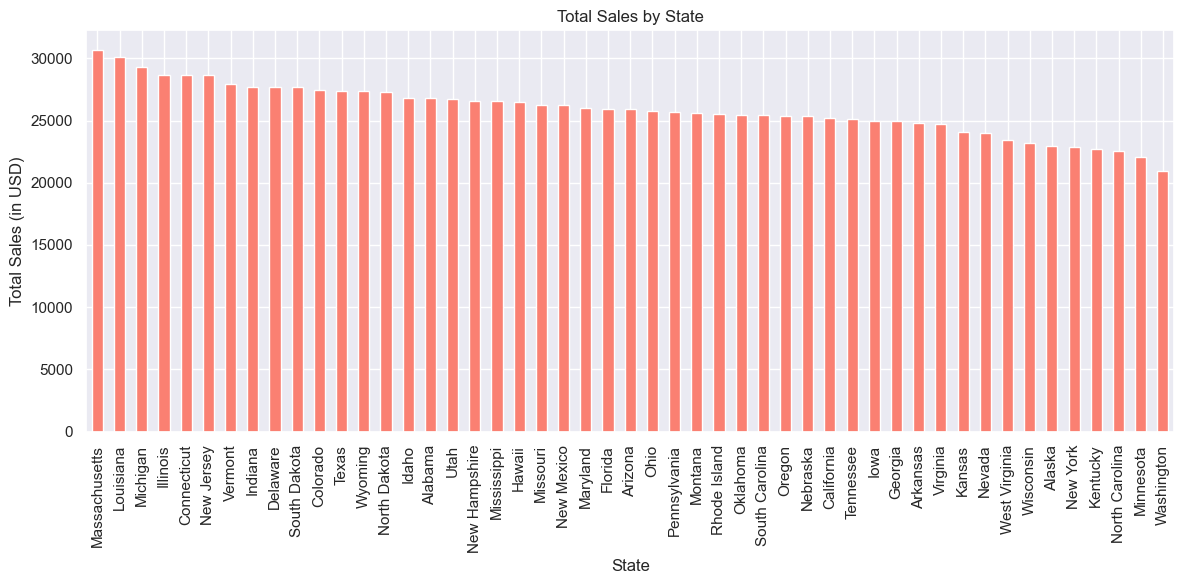

In [39]:
# Objective 4: Total Sales by State
# Total sales by State
State_sales = df.groupby('State')['Amount'].sum().sort_values(ascending=False)
State_sales.plot(kind='bar', color='salmon', figsize=(12, 6))
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales (in USD)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

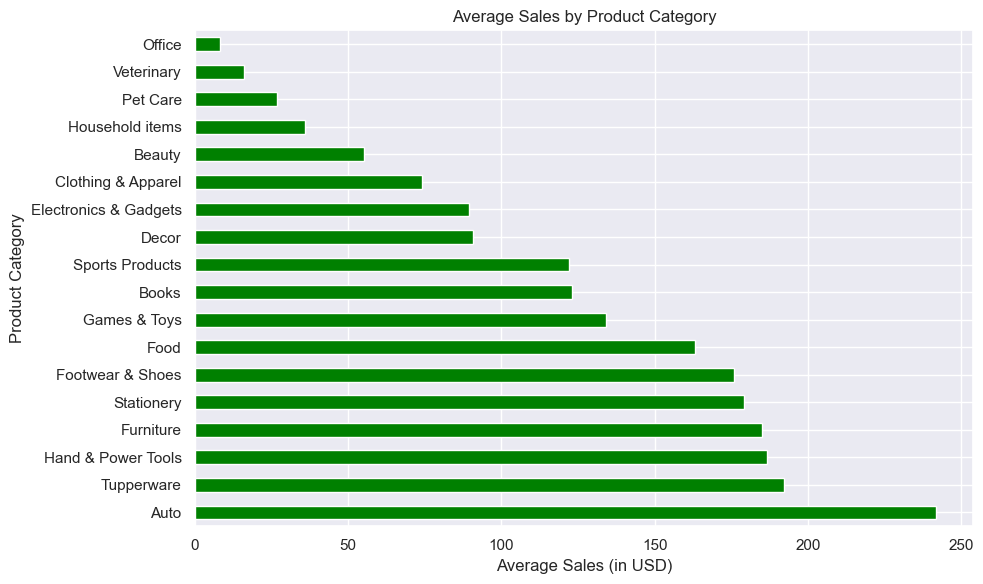

In [40]:
# Objective 5: Average Sales by Product Category
# Average sales by product category
avg_sales_by_category = df.groupby('Product_Category')['Amount']
    .mean().sort_values(ascending=False)
avg_sales_by_category.plot(kind='barh', color='green', figsize=(10, 6))
plt.title('Average Sales by Product Category')
plt.xlabel('Average Sales (in USD)')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

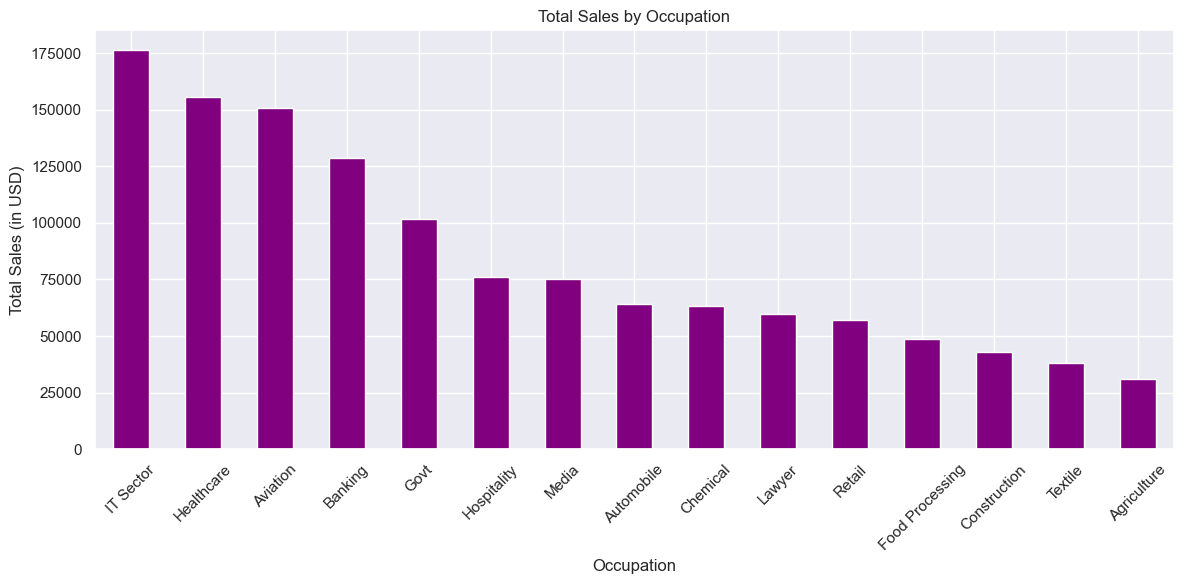

In [41]:
# Objective 6: Sales by Occupation
# Total sales by Occupation
Occupation_sales = df.groupby('Occupation')['Amount'].sum().sort_values(ascending=False)
Occupation_sales.plot(kind='bar', color='purple', figsize=(12, 6))
plt.title('Total Sales by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Total Sales (in USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text(0, 0.5, '')

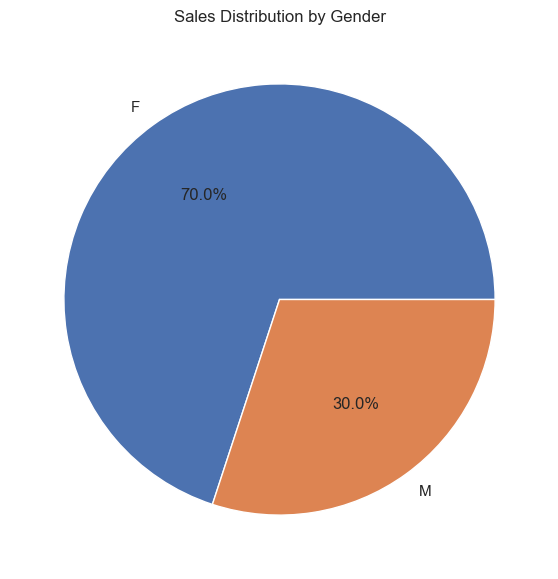

In [42]:
# Objective 7: Sales Distribution by Gender
# Distribution of sales by Gender
Gender_sales_dist = df.groupby('Gender')['Amount'].sum()
Gender_sales_dist.plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7))
plt.title('Sales Distribution by Gender')
plt.ylabel('')

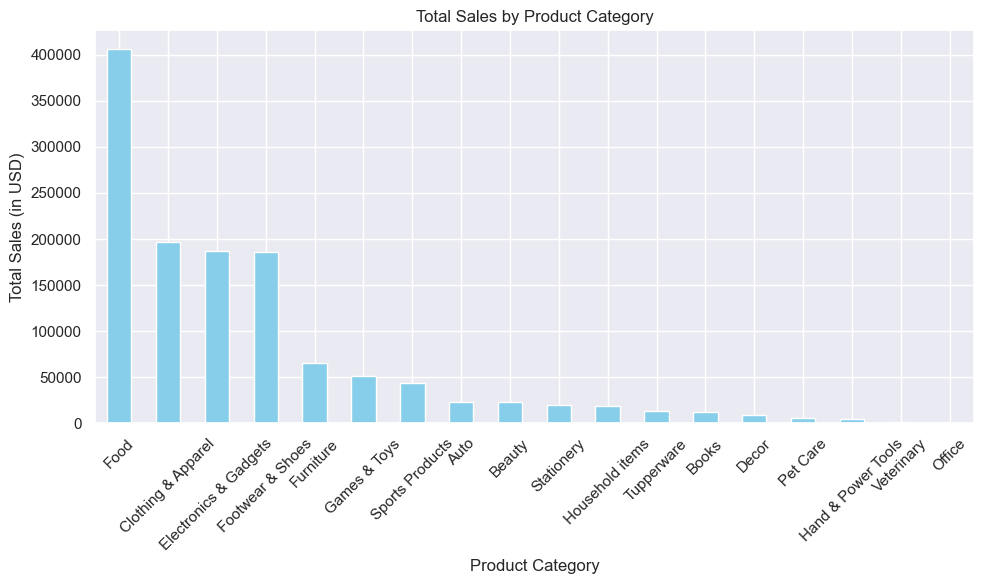

In [43]:
# Objective 8: Visualizing Total Sales by Product Category (in USD)
# Visualizing total sales by product category
plt.figure(figsize=(10, 6))
sales_by_category = df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False)
sales_by_category.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales (in USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

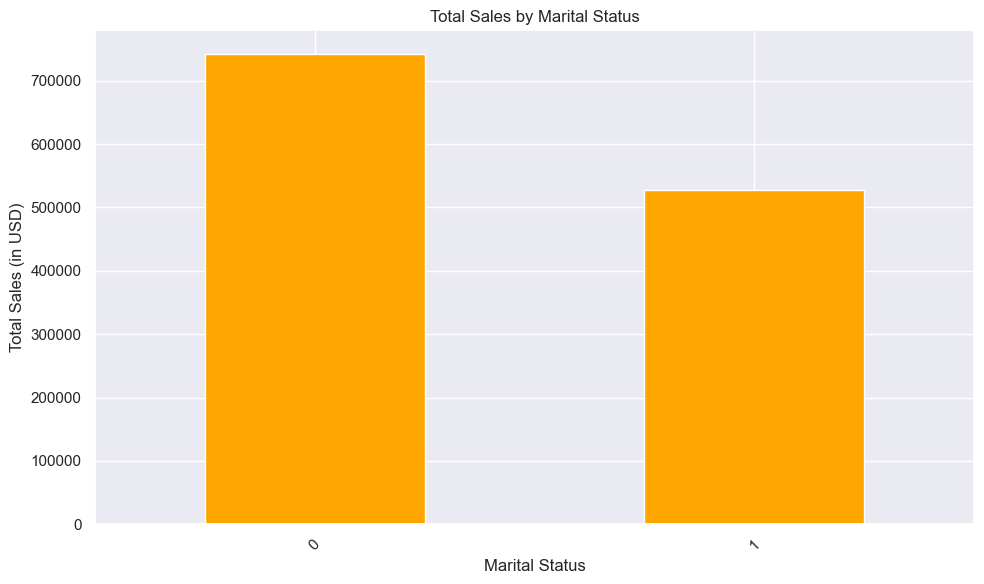

In [44]:
# Additional Insight 1: Sales based on Marital Status (for married and unmarried)
# Total sales by marital status
marital_sales = df.groupby('Marital_Status')['Amount'].sum().sort_values(ascending=False)
marital_sales.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title('Total Sales by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Sales (in USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

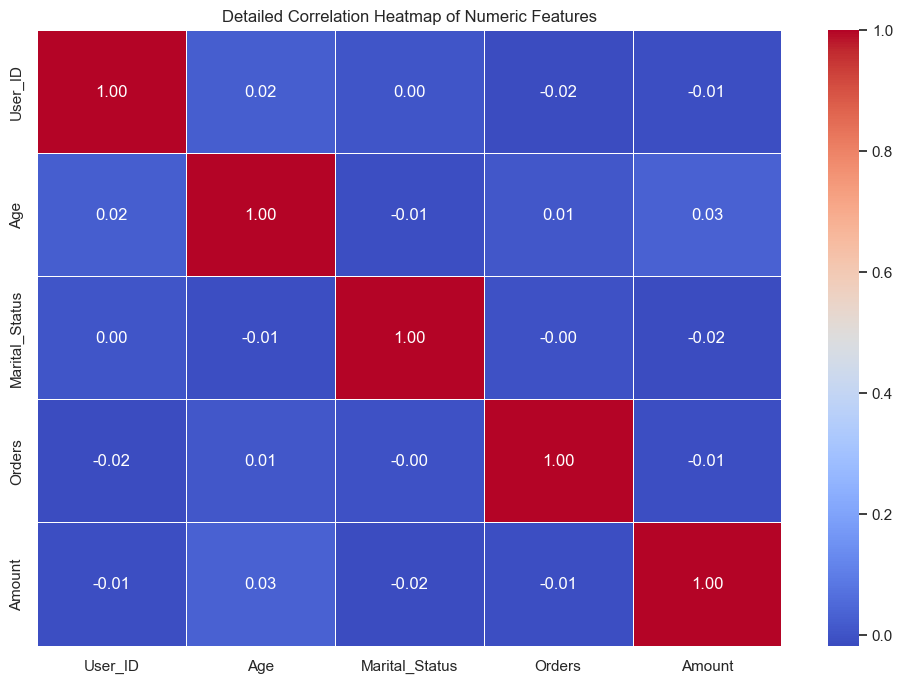

In [46]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plotting correlation heatmap to understand relationships between numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Detailed Correlation Heatmap of Numeric Features')
plt.show()


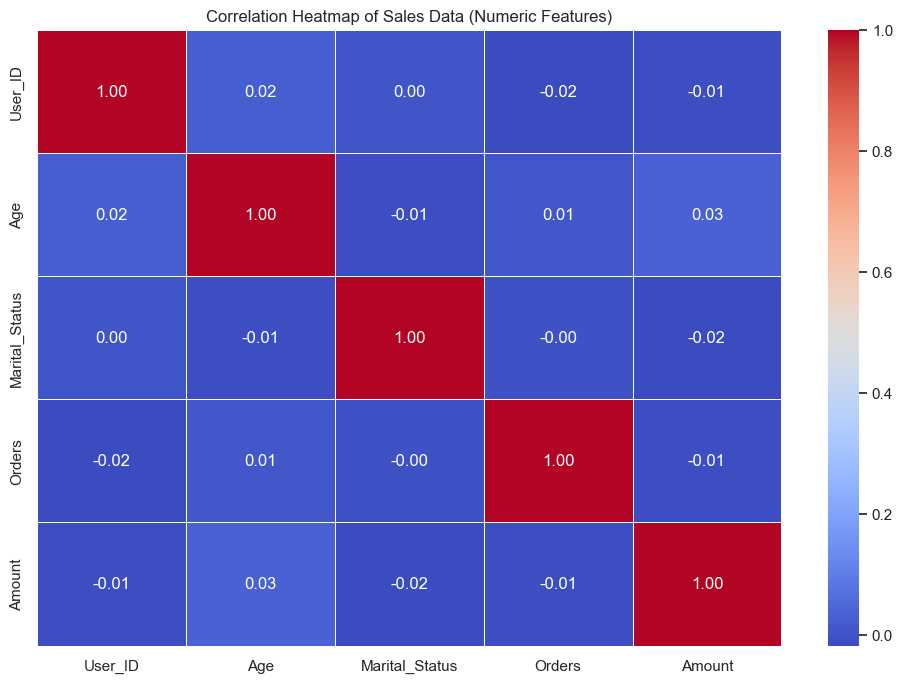

In [47]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plotting correlation heatmap to understand relationships between numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Sales Data (Numeric Features)')
plt.show()


## Conclusion:

### 

High Sales in Electronics and Clothing: The Electronics and Clothing categories consistently generate the highest sales across different demographics. Products from these categories are popular among a broad range of customers, especially those in urban regions.

Product Preferences by Age Group:

Customers in the 26-35 age group show the highest purchase activity, especially in categories such as Electronics, Clothing, and Food.

This age group is also particularly inclined toward purchasing clothing items and electronics, possibly reflecting consumer trends in fashion and technology for young professionals.

Geographic Insights:

States such as California, Texas, and New York show high sales figures, particularly in the Clothing and Electronics categories, reflecting the purchasing power and diverse product preferences in these regions.

Sales are concentrated in Western and Southern zones, which are among the largest contributors to overall sales during the Black Friday season.

Gender and Occupation Insights:

Female customers, especially those in the 26-35 age group, are dominant in terms of the volume of purchases, particularly in the Clothing and Electronics categories.

Occupation groups like IT, Healthcare, and Aviation show high sales in the Electronics and Clothing categories, possibly reflecting the high disposable income of individuals in these fields.

Product Category Preferences:

Electronics and Clothing emerged as the top two categories with the highest total sales. These categories remain the most popular among a broad demographic.

The Food category, while popular, saw lower total sales compared to Electronics and Clothing but showed consistent purchase trends across various states.

Marital Status and Sales:

Married women in the age group of 26-35 years, especially those from urban regions, contribute significantly to overall sales, particularly in categories like Food, Clothing, and Electronics.

These insights can help retailers optimize their marketing strategies and inventory planning, particularly by focusing on high-demand products during key sales periods like Black Friday.